In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

% matplotlib inline

In [2]:
# generate sample with 4 clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.5, random_state=13)

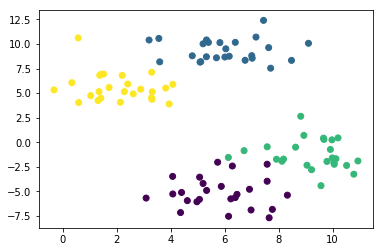

In [3]:
plt.scatter(X[:,0], X[:,1], c = y)

In [4]:
def initialize_centroids(X, k):
    """Return k distinct random points from data"""
    centroids = X.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [5]:
def dist(a, b, ax=0):
    "Return eucludean distance between 2 points"
    return np.linalg.norm(a - b, axis=ax)

In [6]:
def k_means(X, K): 
    """Return value of cost function, indexes of clusters for each point and 
    values of centroids"""
    centroids = initialize_centroids(X, K)
    while True:
        # cluster assignment step
        C = np.array([np.argmin([dist(x_k, y_k) for y_k in centroids]) for x_k in X])
        # move centroids step
        new_centroids = np.array([X[C == k].mean(axis = 0) for k in range(K)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        cost = cost_func(X, centroids, C, K)
    return cost, C, centroids     

In [7]:
def cost_func(X, centroids, C, K): 
    """Return cost function of given clusterization"""
    return np.sum(np.sum((dist(x_k, centroids[k]))**2 for x_k in X[C == k]) 
                                                      for k in range(K))/len(X)    

In [8]:
def best_clusterization(X, K, iter_num = 10):
    """Runs k_means iter_num times and chooses clusterization with the smallest value
    of cost function in order dispense local optima"""
    history = []
    for i in range(iter_num):
        cost, C, centroids =  k_means(X, K)
        history.append((cost, C, centroids))
    return min(history, key=lambda x:x[0])

In [9]:
cost, C, centroids = best_clusterization(X, 4)

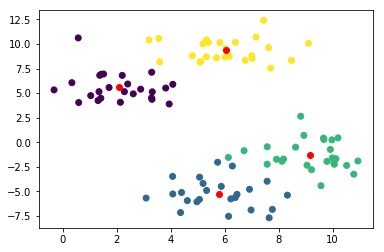

In [10]:
plt.scatter(X[:,0], X[:,1], c = C)
plt.scatter(centroids[:,0], centroids[:,1], c = 'r')

# Comparing with sklearn

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
sk_centers = kmeans.cluster_centers_
sk_preds = kmeans.predict(X)

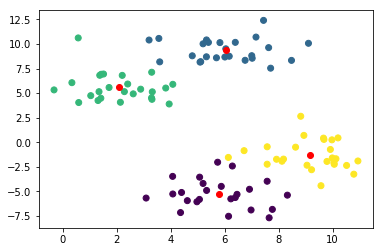

In [12]:
plt.scatter(X[:,0], X[:,1], c = sk_preds)
plt.scatter(sk_centers[:,0], sk_centers[:,1], c = 'r')

In [13]:
print('My centroids:\n', centroids, '\n')
print('Sklearn centroids\n', sk_centers)

My centroids:
 [[ 2.08205133  5.58610336]
 [ 5.78032586 -5.23205718]
 [ 9.16371599 -1.28410657]
 [ 6.04658708  9.34880611]] 

Sklearn centroids
 [[ 5.78032586 -5.23205718]
 [ 6.04658708  9.34880611]
 [ 2.08205133  5.58610336]
 [ 9.16371599 -1.28410657]]


# Choosing the value of K

In [14]:
def elbow_method(X, K):
    """Return values of cost function for number of clusters in range K"""
    costs = []
    for k in range(1, K+1):
        cost, C, centroids = best_clusterization(X, k)
        costs.append(cost)
    return costs    

In [15]:
costs = elbow_method(X, 10)

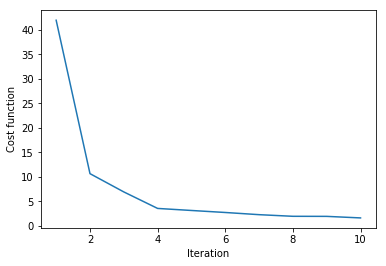

In [16]:
plt.plot(range(1, len(costs)+1), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.show()